<a href="https://colab.research.google.com/github/Jetsadakorn192-7/Data-analytics/blob/main/Lab3%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo -q

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [ ]:
import pandas as pd
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class_label']
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width  Class_label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Accuracy (Gini Index): 96.00%


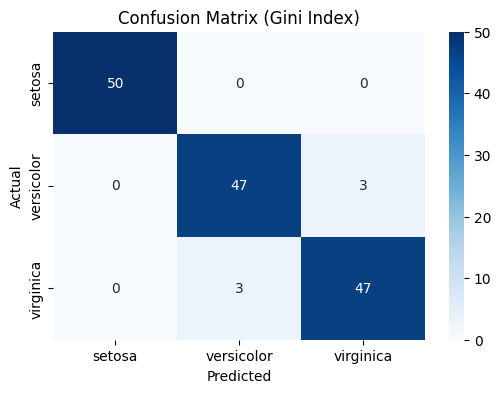

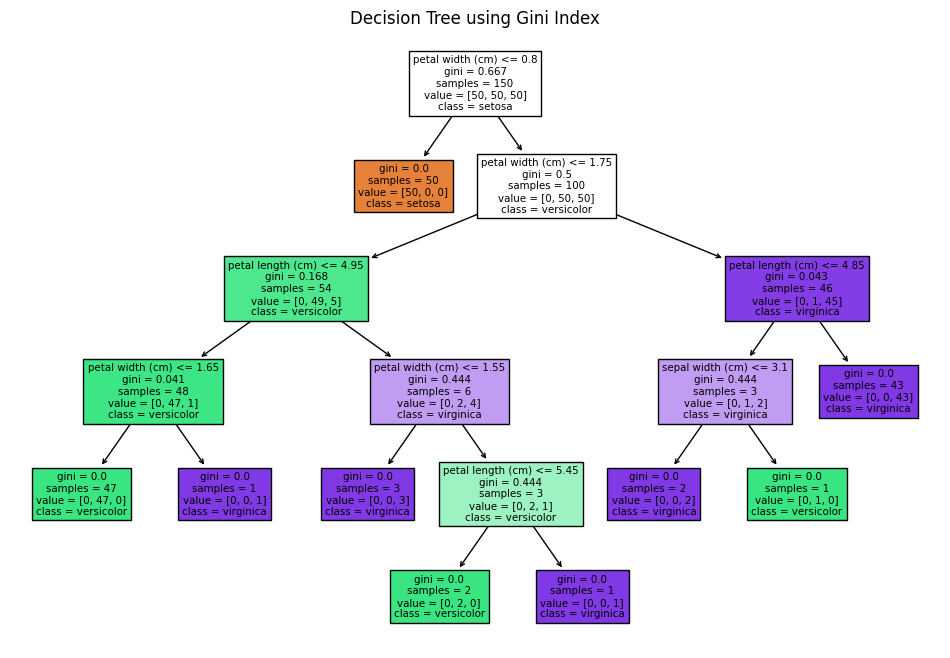

Accuracy (Entropy): 95.33%


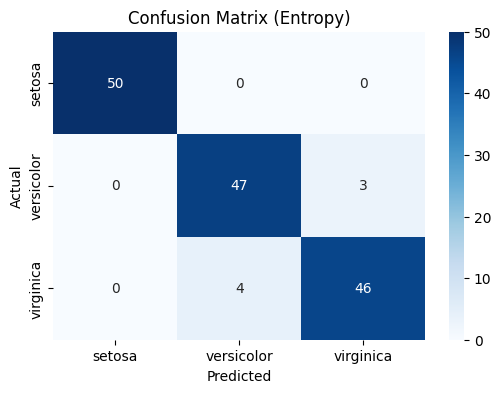

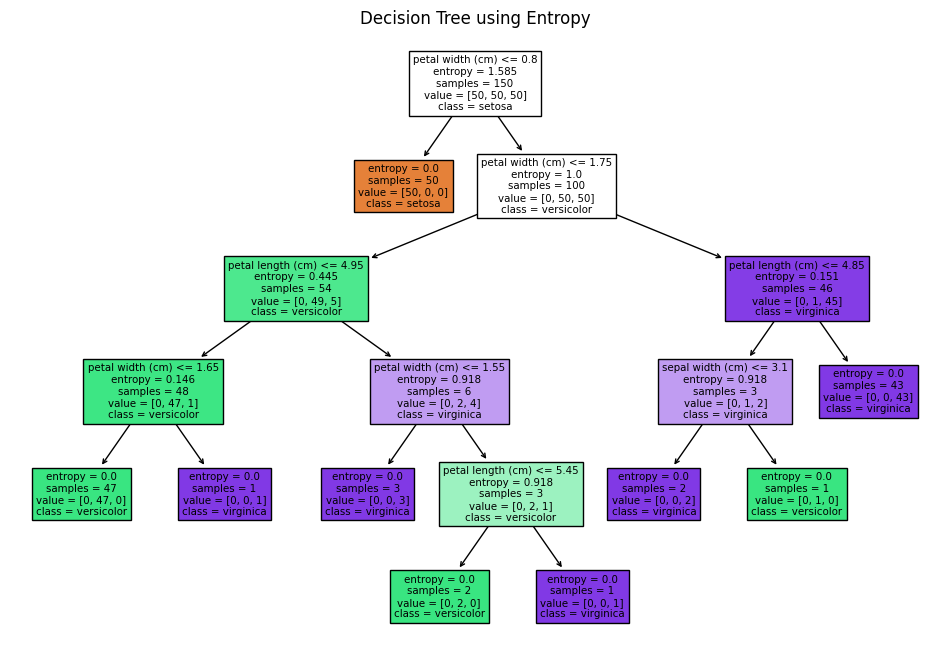

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# โหลดข้อมูล Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# สร้างฟังก์ชันเพื่อแสดง Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Decision Tree using Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
y_pred_gini = cross_val_predict(clf_gini, X, y, cv=5)
clf_gini.fit(X, y)

# แสดงความแม่นยำของ Gini Index
accuracy_gini = accuracy_score(y, y_pred_gini)
print(f"Accuracy (Gini Index): {accuracy_gini * 100:.2f}%")

# แสดง Confusion Matrix ของ Gini Index
plot_confusion_matrix(y, y_pred_gini, "Confusion Matrix (Gini Index)")

# แสดง Decision Tree Diagram (Gini Index)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree using Gini Index")
plt.show()

# Decision Tree using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
y_pred_entropy = cross_val_predict(clf_entropy, X, y, cv=5)
clf_entropy.fit(X, y)

# แสดงความแม่นยำของ Entropy
accuracy_entropy = accuracy_score(y, y_pred_entropy)
print(f"Accuracy (Entropy): {accuracy_entropy * 100:.2f}%")

# แสดง Confusion Matrix ของ Entropy
plot_confusion_matrix(y, y_pred_entropy, "Confusion Matrix (Entropy)")

# แสดง Decision Tree Diagram (Entropy)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_entropy, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree using Entropy")
plt.show()
